In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import logging

FORMAT = '%(asctime)s %(message)s'
logging.basicConfig(level='INFO', format=FORMAT, datefmt='%d-%b-%y %H:%M:%S')

sns.set_context("talk")

In [3]:
from src.parameters import ANIMALS
from loren_frank_data_processing import make_epochs_dataframe


epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info = epoch_info.loc[(epoch_info.type == 'run') &
                            (epoch_info.environment == 'wtrack')]
epoch_info

environment type  exposure
animal day epoch                           
Jaq    3   2          wtrack  run       1.0
           4          wtrack  run       2.0
           6          wtrack  run       3.0
           8          wtrack  run       4.0
           10         wtrack  run       5.0
...                      ...  ...       ...
Roqui  5   6          wtrack  run      25.0
           8          wtrack  run      26.0
       6   2          wtrack  run      27.0
           4          wtrack  run      28.0
           6          wtrack  run      29.0

[89 rows x 3 columns]

In [4]:
import pandas as pd

replay_info = pd.read_csv('/stelmo/edeno/pose_analysis/notebooks/forward_reverse_replay_info.csv').set_index(['Animal', 'Day', 'Epoch', 'replay_number'])
replay_info

Inbound-Forward  Inbound-Reverse  \
Animal Day Epoch replay_number                                     
Jaq    3   2     1                        False             True   
                 2                        False             True   
                 3                        False             True   
                 4                        False            False   
                 5                        False            False   
...                                         ...              ...   
Roqui  6   6     97                       False            False   
                 98                       False            False   
                 99                       False            False   
                 100                      False            False   
                 101                      False            False   

                                Outbound-Forward  Outbound-Reverse  \
Animal Day Epoch replay_number                                       
Jaq    3   2     1                         False             False   
                 2                         False             False   
                 3                         False             False   
                 4                         False             False   
                 5                          True              True   
...                                          ...               ...   
Roqui  6   6     97                        False             False   
                 98                        False             False   
                 99                        False             False   
                 100                       False             False   
                 101                       False             False   

                                Fragmented  Inbound-Forward_duration  \
Animal Day Epoch replay_number                                         
Jaq    3   2     1                    True                       0.0   
                 2                   False                       0.0   
                 3                   False                       0.0   
                 4                    True                       0.0   
                 5                   False                       0.0   
...                                    ...                       ...   
Roqui  6   6     97                  False                       0.0   
                 98                  False                       0.0   
                 99                  False                       0.0   
                 100                 False                       0.0   
                 101                 False                       0.0   

                                Inbound-Reverse_duration  \
Animal Day Epoch replay_number                             
Jaq    3   2     1                                 0.030   
                 2                                 0.004   
                 3                                 0.058   
                 4                                 0.000   
                 5                                 0.000   
...                                                  ...   
Roqui  6   6     97                                0.000   
                 98                                0.000   
                 99                                0.000   
                 100                               0.000   
                 101                               0.000   

                                Outbound-Forward_duration  \
Animal Day Epoch replay_number                              
Jaq    3   2     1                                  0.000   
                 2                                  0.000   
                 3                                  0.000   
                 4                                  0.000   
                 5                                  0.046   
...                                                   ...   
Roqui  6   6     97           

In [5]:
is_state = replay_info['Inbound-Forward'] & replay_info['Outbound-Reverse']
replay_info.loc[is_state].index.tolist()

[('Jaq', 3, 2, 18),
 ('Jaq', 3, 2, 19),
 ('Jaq', 3, 2, 29),
 ('Jaq', 3, 2, 30),
 ('Jaq', 3, 2, 33),
 ('Jaq', 3, 2, 36),
 ('Jaq', 3, 2, 59),
 ('Jaq', 3, 2, 66),
 ('Jaq', 3, 2, 68),
 ('Jaq', 3, 2, 75),
 ('Jaq', 3, 2, 78),
 ('Jaq', 3, 2, 86),
 ('Jaq', 3, 2, 88),
 ('Jaq', 3, 2, 93),
 ('Jaq', 3, 2, 103),
 ('Jaq', 3, 2, 109),
 ('Jaq', 3, 2, 111),
 ('Jaq', 3, 2, 116),
 ('Jaq', 3, 2, 125),
 ('Jaq', 3, 2, 144),
 ('Jaq', 3, 2, 161),
 ('Jaq', 3, 2, 163),
 ('Jaq', 3, 2, 176),
 ('Jaq', 3, 2, 179),
 ('Jaq', 3, 2, 184),
 ('Jaq', 3, 2, 188),
 ('Jaq', 3, 2, 203),
 ('Jaq', 3, 2, 209),
 ('Jaq', 3, 4, 20),
 ('Jaq', 3, 4, 22),
 ('Jaq', 3, 4, 34),
 ('Jaq', 3, 4, 39),
 ('Jaq', 3, 4, 42),
 ('Jaq', 3, 4, 43),
 ('Jaq', 3, 4, 72),
 ('Jaq', 3, 4, 80),
 ('Jaq', 3, 4, 83),
 ('Jaq', 3, 4, 89),
 ('Jaq', 3, 4, 95),
 ('Jaq', 3, 4, 104),
 ('Jaq', 3, 4, 109),
 ('Jaq', 3, 4, 159),
 ('Jaq', 3, 4, 168),
 ('Jaq', 3, 4, 174),
 ('Jaq', 3, 4, 182),
 ('Jaq', 3, 4, 185),
 ('Jaq', 3, 4, 186),
 ('Jaq', 3, 6, 9),
 ('Jaq', 3, 6, 30),

In [6]:
import copy


def plot_classifier_inbound_outbound(
    time_slice,
    classifier,
    results,
    data,
    posterior_type="acausal_posterior",
    figsize=(30, 15),
    legend=True,
):
    result = results[posterior_type].sel(time=time_slice)
    t = data["position_info"].index / np.timedelta64(1, "s")
    cmap = copy.copy(plt.get_cmap('bone_r'))
    cmap.set_bad(color="lightgrey", alpha=1.0)

    fig, axes = plt.subplots(
        4,
        1,
        figsize=figsize,
        sharex=True,
        constrained_layout=True,
        gridspec_kw={"height_ratios": [3, 1, 1, 1]},
    )

    # ax 0
    (result
     .sum('state')
     .where(classifier.is_track_interior_)
     .plot(
         x="time",
         y="position",
         robust=True,
         ax=axes[0],
         cmap=cmap,
         vmin=0.0,
         add_colorbar=legend,
    ))

    axes[0].set_ylabel("Position [cm]")

    axes[0].scatter(
        data["position_info"].reset_index().set_index(t).loc[time_slice].index,
        data["position_info"]
        .reset_index()
        .set_index(t)
        .loc[time_slice]
        .linear_position,
        color="magenta",
        alpha=0.8,
        s=10,
        zorder=100,
    )
    axes[0].set_xlabel("")

    # ax 1
    fragmented = (result
                  .sel(state=['Inbound-Fragmented', 'Outbound-Fragmented'])
                  .sum(['state', 'position'])
                  .assign_coords({'state': 'Fragmented'}))
    probability = (result
                   .sum('position')
                   .drop_sel(state=['Inbound-Fragmented', 'Outbound-Fragmented']))
    probability = xr.concat((probability, fragmented), dim='state')
    h = probability.plot(
        x="time", hue="state", ax=axes[1], add_legend=False, clip_on=False,
    )
    if legend:
        axes[1].legend(handles=h, labels=probability.state.values.tolist(),
                       bbox_to_anchor=(1.10, 0.8), loc='upper right', ncol=1, fontsize=12)
    axes[1].set_ylabel("Probability")
    axes[1].set_xlabel("")
    axes[1].set_ylim((0, 1))

    # ax 2
    multiunit_firing = (
        data["multiunit_firing_rate"]
        .reset_index(drop=True)
        .set_index(
            data["multiunit_firing_rate"].index / np.timedelta64(1, "s"))
    )

    axes[2].fill_between(
        multiunit_firing.loc[time_slice].index.values,
        multiunit_firing.loc[time_slice].values.squeeze(),
        color="black",
    )
    axes[2].set_ylabel("Firing Rate\n[spikes / s]")

    # ax 3
    axes[3].fill_between(
        data["position_info"].reset_index().set_index(t).loc[time_slice].index,
        np.abs(data["position_info"]
               .reset_index()
               .set_index(t)
               .loc[time_slice]
               .tailBase_vel.values.squeeze()),
        color="lightgrey",
        linewidth=1,
        alpha=0.5,
    )
    axes[3].set_ylabel("Speed \n[cm / s]")
    axes[3].set_xlabel("Time [s]")
    axes[3].ticklabel_format(style='plain', axis='x')
    
    sns.despine()

In [7]:
from replay_trajectory_classification import ClusterlessClassifier
import os
from src.load_data import load_data
import xarray as xr
from src.parameters import PROCESSED_DATA_DIR

epoch_key = 'Peanut', 1, 2

epoch_identifier = f"{epoch_key[0]}_{epoch_key[1]:02d}_{epoch_key[2]:02d}"
results_filename = os.path.join(
    PROCESSED_DATA_DIR,
    f"{epoch_identifier}_clusterless_forward_reverse_results.nc"
)
results = xr.open_dataset(results_filename)
data = load_data(epoch_key,
                 position_to_linearize=['nose_x', 'nose_y'],
                 max_distance_from_well=30,
                 min_distance_traveled=50,
                 )

classifier_filename = os.path.join(
    PROCESSED_DATA_DIR,
    f"{epoch_identifier}_clusterless_forward_reverse_classifier.pkl")
classifier = ClusterlessClassifier.load_model(classifier_filename)

11-Nov-21 13:33:22 Loading position info...
11-Nov-21 13:34:03 Loading multiunit...
11-Nov-21 13:34:09 Loading spikes...
11-Nov-21 13:34:12 Finding ripple times...


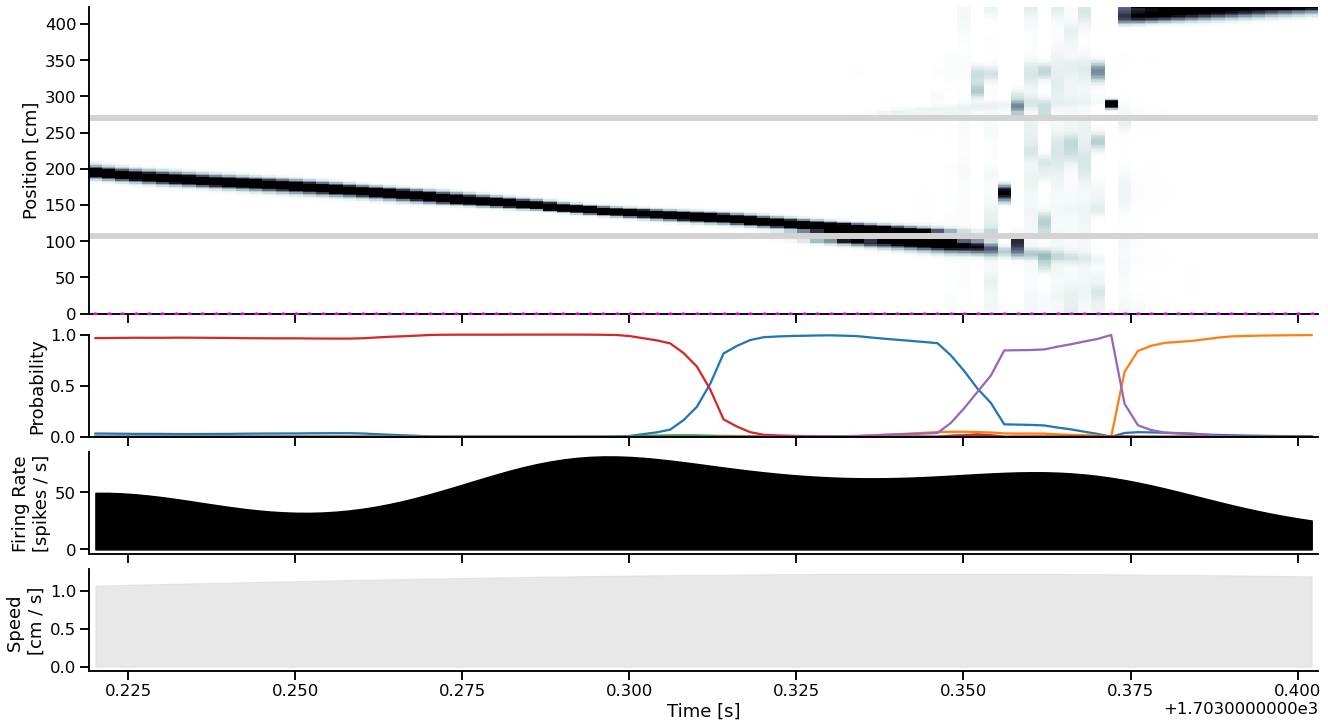

In [8]:
ripple_number = 22
ripple = data['ripple_times'].loc[ripple_number]

plot_classifier_inbound_outbound(
    slice(ripple.start_time / np.timedelta64(1, 's'),
          ripple.end_time / np.timedelta64(1, 's')),
    classifier,
    results,
    data,
    posterior_type="acausal_posterior",
    figsize=(ripple.duration * 100, 10),
    legend=False,
)

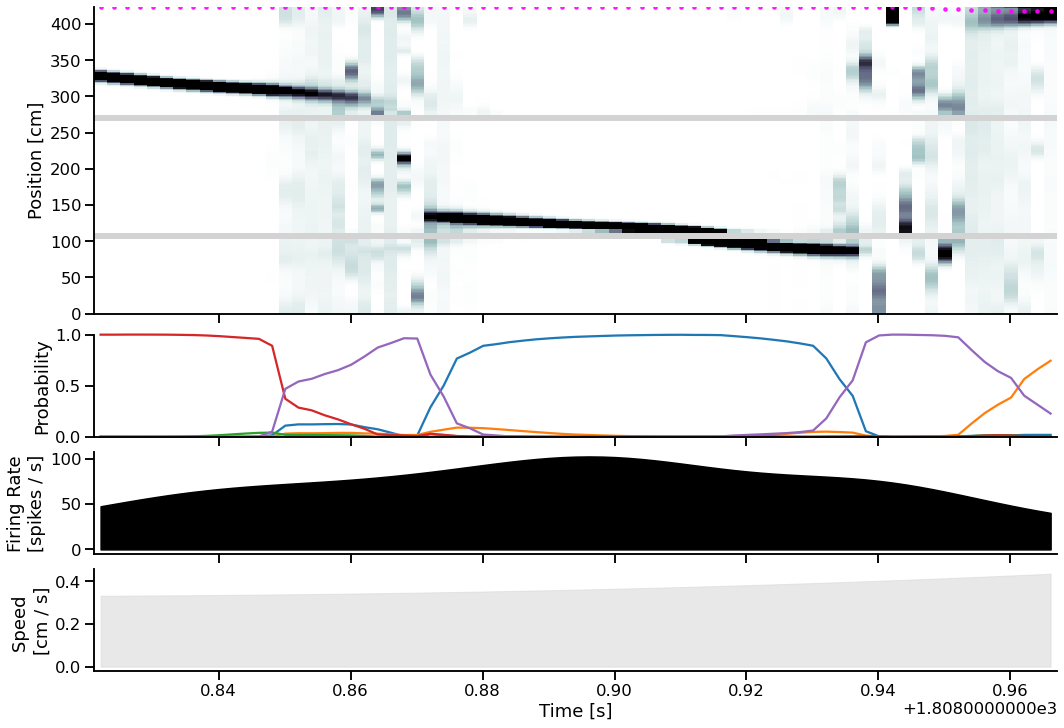

In [9]:
ripple_number = 40
ripple = data['ripple_times'].loc[ripple_number]

plot_classifier_inbound_outbound(
    slice(ripple.start_time / np.timedelta64(1, 's'),
          ripple.end_time / np.timedelta64(1, 's')),
    classifier,
    results,
    data,
    posterior_type="acausal_posterior",
    figsize=(ripple.duration * 100, 10),
    legend=False,
)

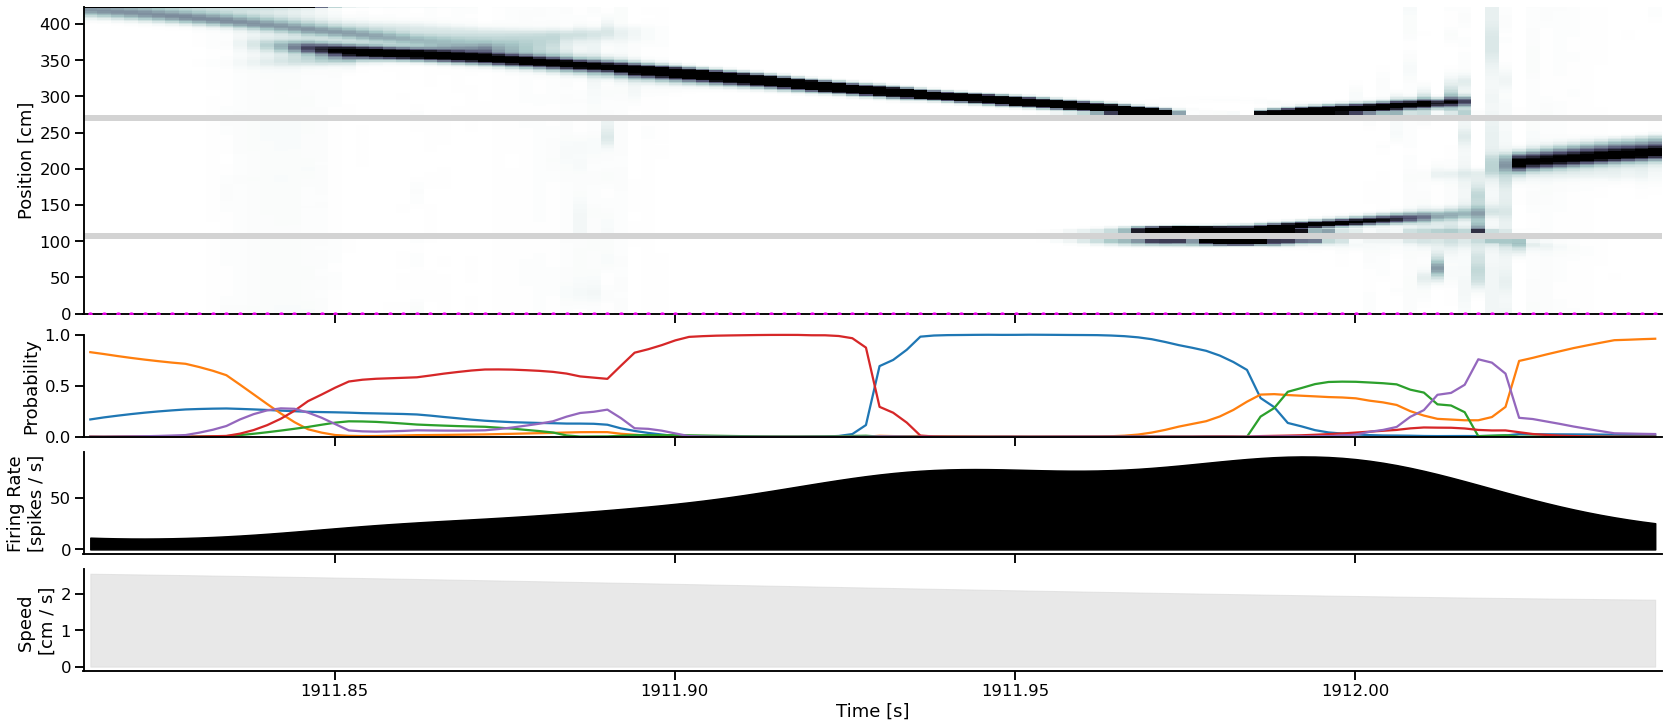

In [10]:
ripple_number = 46
ripple = data['ripple_times'].loc[ripple_number]

plot_classifier_inbound_outbound(
    slice(ripple.start_time / np.timedelta64(1, 's'),
          ripple.end_time / np.timedelta64(1, 's')),
    classifier,
    results,
    data,
    posterior_type="acausal_posterior",
    figsize=(ripple.duration * 100, 10),
    legend=False,
)